<a href="https://colab.research.google.com/github/rakibhossainporosh/Random-Forest/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Machine learning lab/student-scores.csv')

In [3]:
print("Training Data Shape:", df.shape)

Training Data Shape: (2000, 17)


In [4]:
print("\nFirst few rows of training data:")
print(df.head())


First few rows of training data:
   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer       

In [5]:
print("\nMissing values in training data:")
print(df.isnull().sum())


Missing values in training data:
id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64


In [6]:
df.shape

(2000, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [8]:
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [9]:
print("Training Columns:\n", df.columns.tolist())

Training Columns:
 ['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job', 'absence_days', 'extracurricular_activities', 'weekly_self_study_hours', 'career_aspiration', 'math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']


In [10]:
from sklearn.preprocessing import LabelEncoder

In [12]:
df.drop(columns=['id'], inplace=True)

In [14]:
df = df[df['geography_score'].notna()].copy()

In [15]:
df['geography_score'] = df['geography_score'].astype(int)

In [17]:
cat_cols = ['weekly_self_study_hours', 'extracurricular_activities', 'part_time_job']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [18]:
X = df.drop('geography_score', axis=1)
y = df['geography_score']

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

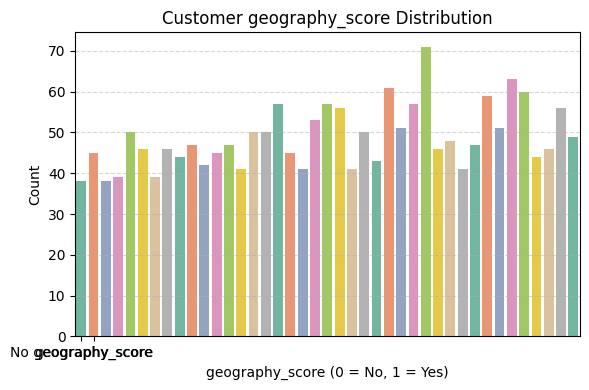

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='geography_score', hue='geography_score', palette='Set2', legend=False)
plt.title('Customer geography_score Distribution')
plt.xlabel('geography_score (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No geography_score', 'geography_score'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Example dataset
from sklearn.metrics import classification_report

# Example: Load dataset and split into training and testing sets
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate predictions
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [26]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)


rf_model = RandomForestClassifier(
    n_estimators=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

#Evaluation with Full Metrics

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass
f1 = f1_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr') # Use ovr for multiclass
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Confusion matrix (This calculation is for binary classification, need to adapt for multiclass or remove)
# For multiclass, confusion_matrix returns a 2D array. Accessing elements by index like .ravel() won't work directly.
# You can print the confusion matrix or calculate metrics per class.
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Print results
print(f"\nAccuracy:              {accuracy:.5f}")
print(f"Precision (weighted):  {precision:.5f}")
print(f"Recall (weighted):     {recall:.5f}")
print(f"F1 Score (weighted):   {f1:.5f}")
print(f"ROC AUC (OvR):         {roc_auc:.5f}")
print(f"Balanced Accuracy:     {balanced_acc:.5f}")
print(f"Matthews Corr Coef:    {mcc:.5f}")


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy:              1.00000
Precision (weighted):  1.00000
Recall (weighted):     1.00000
F1 Score (weighted):   1.00000
ROC AUC (OvR):         1.00000
Balanced Accuracy:     1.00000
Matthews Corr Coef:    1.00000


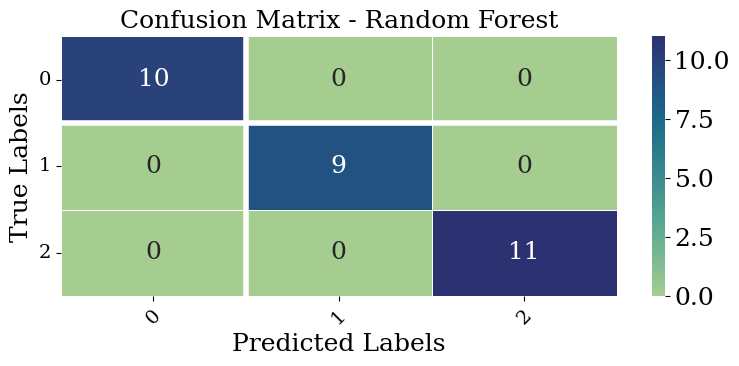

In [32]:
#Confusion Matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Random Forest"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(np.unique(y_test))  # Corrected: use np.unique() for numpy arrays

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

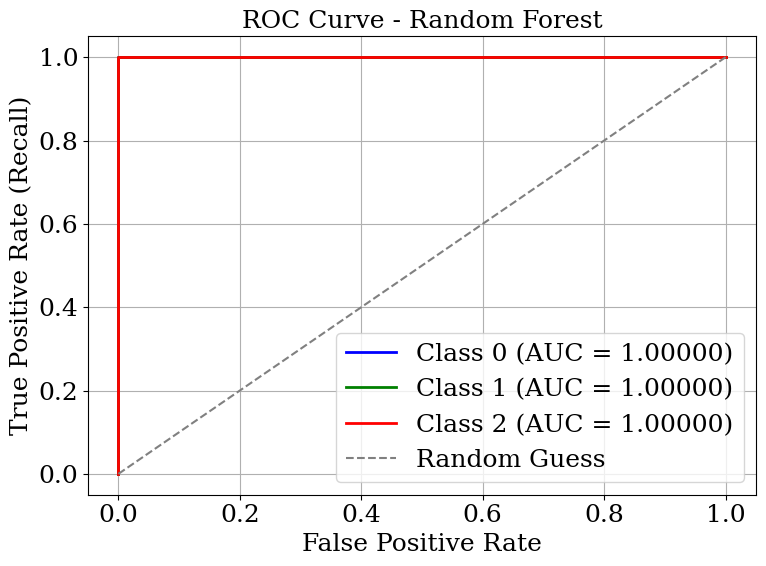

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities
y_proba = rf_model.predict_proba(X_test)

# Check if binary or multiclass
n_classes = y_proba.shape[1]

plt.figure(figsize=(8, 6))

if n_classes == 2:
    # Binary classification
    y_score = y_proba[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = roc_auc_score(y_test, y_score)

    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.5f})", color='blue')

else:
    # Multiclass classification (One-vs-Rest)
    from sklearn.preprocessing import label_binarize
    from itertools import cycle

    # Binarize the output labels
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    colors = cycle(['blue', 'green', 'red', 'purple', 'orange', 'brown'])

    for i, color in zip(range(n_classes), colors):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_proba[:, i])
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f"Class {i} (AUC = {roc_auc[i]:.5f})")

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


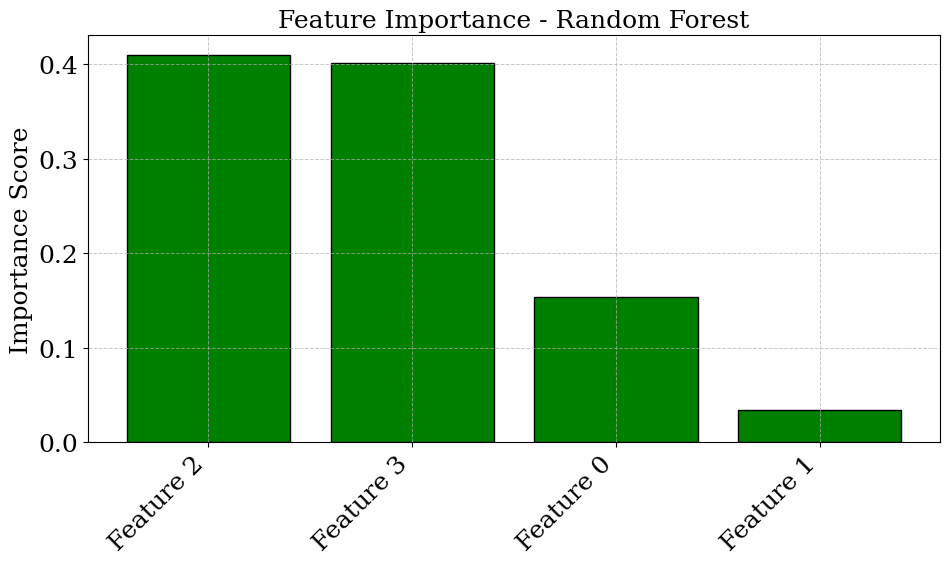

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_

# Try to get feature names from X_train if it's a DataFrame
try:
    features = X_train.columns
except AttributeError:
    features = [f"Feature {i}" for i in range(X_train.shape[1])]

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(features)), importances[indices], align='center',
        color='green', edgecolor='black')
plt.xticks(range(len(features)), np.array(features)[indices],
           rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()
